In [ ]:
# Plot the Delhi-NCR shapefile using matplotlib and overlay a 60×60 km uniform grid

In [1]:
 import geopandas as gpd
 import matplotlib.pyplot as plt


In [25]:
gpd.read_file("delhi_ncr_region.geojson")

,geometry
0,"POLYGON ((76.85108 28.22115, 76.85219 28.22098..."
1,"POLYGON ((77.15903 29.29436, 77.15999 29.29427..."
2,"MULTIPOLYGON (((77.07565 27.27704, 77.07819 27..."
3,"POLYGON ((77.97073 28.71104, 77.97089 28.71096..."
4,"POLYGON ((77.2143 28.78524, 77.21521 28.78514,..."
5,"POLYGON ((77.39054 28.63475, 77.39107 28.63431..."
6,"POLYGON ((77.45693 28.92601, 77.4587 28.92535,..."
7,"POLYGON ((78.05232 28.88322, 78.05345 28.88317..."
8,"POLYGON ((77.59747 29.25693, 77.59772 29.25677..."
9,"POLYGON ((77.94034 29.71194, 77.94094 29.71084..."


In [26]:
shapefile = gpd.read_file("delhi_ncr_region.geojson")

In [27]:
import matplotlib.pyplot as plt


<Axes: >

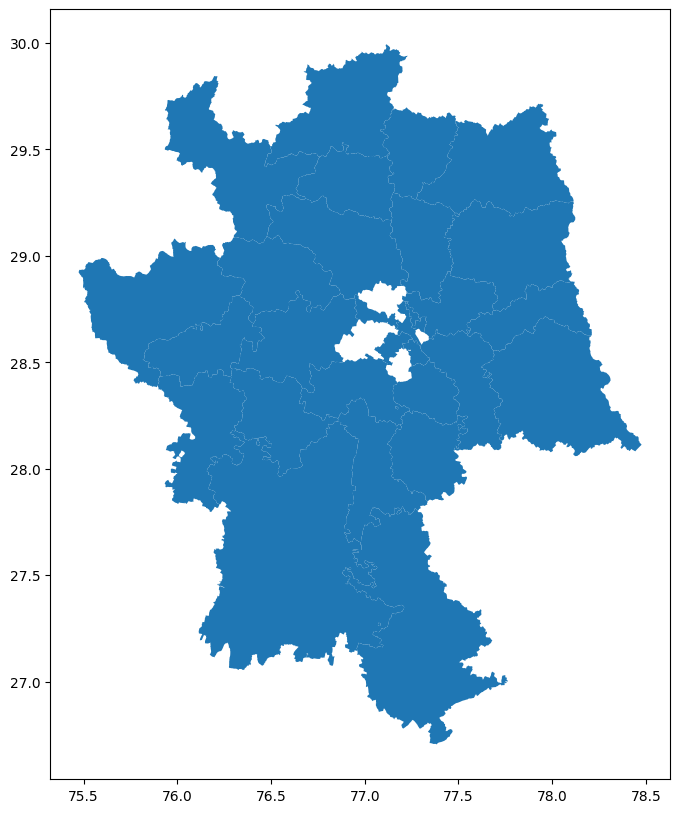

In [28]:
fig,ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax)

In [6]:
from shapely.geometry import box
import numpy as np

In [29]:
shapefile = gpd.read_file("delhi_ncr_region.geojson")

In [48]:
shapefile_projected = shapefile.to_crs('EPSG:32644')

In [50]:
minx, miny, maxx, maxy = shapefile_projected.total_bounds

In [51]:
grid_size = 60000

In [52]:
grid_cells = []
# Generate grid cells in the projected CRS
for x0 in np.arange(minx, maxx, grid_size):
    for y0 in np.arange(miny, maxy, grid_size):
        x1 = x0 + grid_size
        y1 = y0 + grid_size
        cell = box(x0, y0, x1, y1)  # shapely box
        grid_cells.append(cell)

In [53]:
# Create a GeoDataFrame for the grid in the projected CRS
grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs='EPSG:32644')

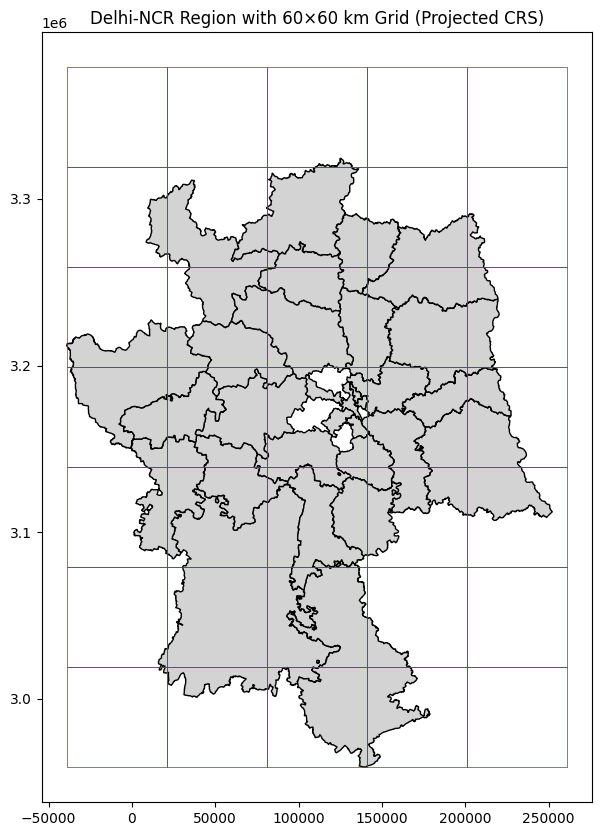

In [54]:
# Plot the projected shapefile and grid
fig,ax = plt.subplots(figsize=(10, 10))
shapefile_projected.plot(ax=ax, color='lightgray', edgecolor='black')
grid.boundary.plot(ax=ax, color='red', linewidth=0.5)
ax.set_aspect('equal') # Set the aspect ratio to equal
ax.set_title("Delhi-NCR Region with 60×60 km Grid (Projected CRS)")
plt.show()